# COVI19 Turkey Data



In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from scipy.spatial import distance  # Ekledik
from joblib import dump, load  # Ekledik
import os


In [68]:
plt.style.use('ggplot')

In [69]:
# Dosyayı okuma
dosya_yolu = r"C:\Users\esras\Desktop\covid\tr_covid_en.csv"
dataset = pd.read_csv(dosya_yolu, sep=';', index_col=0)
dataset.index = pd.to_datetime(dataset.index, format='%d.%m.%Y')
output_folder = r"C:\Users\esras\Desktop\covid\outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    

In [70]:
for col in dataset.columns.tolist():
    plt.figure(figsize=(10, 6))
    x_axis = dataset.index.values
    y_axis = dataset[col].values
    plt.plot(x_axis, y_axis, label=col, marker='o')
    plt.title(col)
    plt.xlabel("Day")
    plt.ylabel("Number of people")
    plt.xticks(pd.date_range(dataset.index.values[0], dataset.index.values[-1], freq='W'), rotation=90)
    counter = 0
    for j, k in zip(x_axis, y_axis):
        counter += 1
        if not counter % 7:
            plt.annotate(str(k), xy=(j, k))
    plt.savefig(os.path.join(output_folder, "{}.png".format(col)))
    plt.close()

In [71]:
X = dataset[['num_tests', 'num_deaths']]  # Özellikler
y = dataset[['total_intensive_care', 'total_intubated']]  # Hedef değişken


In [108]:
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False, random_state=42)


In [109]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [110]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


In [111]:
# Model performansının değerlendirilmesi
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_predicted_lr = lr.predict(X_test_scaled)

In [112]:
print("Linear Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_predicted_lr))
print("R-squared:", r2_score(y_test, y_predicted_lr))

Linear Regression Performance:
Mean Squared Error: 393238.60470070865
R-squared: -0.02991383856370189


In [113]:

# MLP modelini tanımlama
mlp = MLPRegressor(hidden_layer_sizes=(75), max_iter=2000, learning_rate_init=0.1, random_state=42)

# Modeli eğitme
mlp.fit(X_scaled, y_scaled)

# Tahmin yapma
y_predicted_mlp = mlp.predict(X_scaled)

# Model değerlendirmesi
mse = mean_squared_error(y_scaled, y_predicted_mlp)
r2 = r2_score(y_scaled, y_predicted_mlp)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.00545122621311585
R2 Score: 0.9619569390759679


In [114]:
dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns)

In [115]:
dataset_shifted = dataset.iloc[9:,:]

dataset_scaled.corr()
corr = dataset_shifted.corr()

In [116]:
  # ilk 8 günün verisi öngörülebilir olmadığı için öteleyelim
dataset_shifted = dataset.iloc[9:,:]
dataset_shifted.head()

corr = dataset_shifted.corr()


In [117]:
# About Data.
dataset_shifted.describe()

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,21255.484848,2890.878788,1107.484848,687.303030,452.848485,68.363636
std,13421.055955,1595.323728,724.413518,424.414559,571.175275,43.126136
min,1758.000000,167.000000,0.000000,0.000000,0.000000,1.000000
25%,7641.000000,1704.000000,445.000000,309.000000,28.000000,21.000000
50%,20023.000000,3135.000000,1381.000000,935.000000,256.000000,76.000000
75%,34090.000000,4117.000000,1786.000000,1021.000000,542.000000,98.000000
max,40520.000000,5138.000000,1922.000000,1087.000000,1822.000000,127.000000


In [118]:
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset_shifted))

<Axes: >

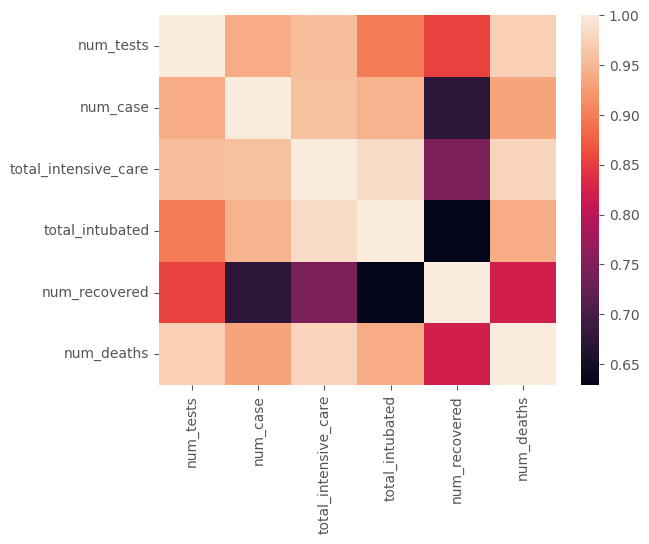

In [119]:
heatmap(corr,
        xticklabels=dataset_shifted.columns,
        yticklabels=dataset_shifted.columns)

num_case ile num_recovered girdi değişkeni, num_intube, num_yogun_bakim ise çıktı değişkeni olarak alınmıştır.

In [120]:
X = dataset_scaled.iloc[:, [1,4]]
y = dataset_scaled.iloc[:,[2,3]]

In [121]:
X

,1,4
0,0.000000,0.000000
1,0.028968,0.000000
2,0.080266,0.000000
3,0.025347,0.000000
4,0.035405,0.000000
5,0.079260,0.014270
6,0.207001,0.000000
7,0.382619,0.008782
8,0.309193,0.015368
9,0.331523,0.019210


In [122]:
lr = LinearRegression()
lr.fit(X.values, y.values)
y_predicted_lr = lr.predict(X.values)
print(mean_squared_error(y.values, y_predicted_lr))
print(r2_score(y.values, y_predicted_lr))

0.012063532495168396
0.9162630883651933


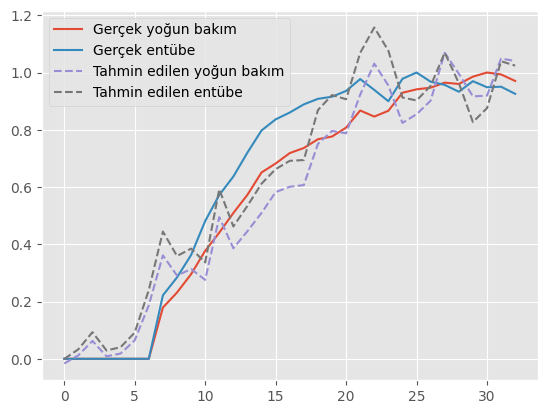

In [123]:
%matplotlib inline
ax = y.plot(linestyle='-')
pd.DataFrame(y_predicted_lr,columns=y.columns).plot(ax=ax,linestyle='--')
ax.legend(['Gerçek yoğun bakım', 'Gerçek entübe', 'Tahmin edilen yoğun bakım', 'Tahmin edilen entübe'])

plt.plot(dataset_shifted.index.values, y.values, label='actual')
plt.plot(dataset_shifted.index.values, y_predicted_lr, label='predict')
plt.xticks(pd.date_range(dataset.index.values[0],
                         dataset.index.values[-1],
                         freq='W'),
           rotation=90)
plt.title('LR Model')
plt.xlabel('Day')
plt.ylabel('Number of deaths')
plt.legend()
#plt.savefig("outputs/lr.png")

In [124]:
mlp = MLPRegressor(hidden_layer_sizes=(75),max_iter=1000,learning_rate_init=0.10, random_state=42)
mlp.fit(X.values, y.values)
y_predicted_mlp = mlp.predict(X.values)


In [125]:
# Model evaluation
r2_mlp = r2_score(y.values, y_predicted_mlp)
print("mean_squared_error: ", mean_squared_error(y.values, y_predicted_mlp))
print("r2_score: ", r2_score(y.values, y_predicted_mlp))

mean_squared_error:  0.00545122621311585
r2_score:  0.9619569390759679


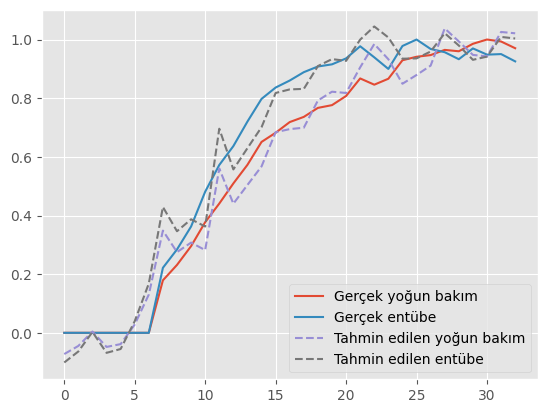

In [126]:
ax = y.plot(linestyle='-')
pd.DataFrame(y_predicted_mlp,columns=y.columns).plot(ax=ax,linestyle='--')
ax.legend(['Gerçek yoğun bakım', 'Gerçek entübe', 'Tahmin edilen yoğun bakım', 'Tahmin edilen entübe'])
plt.savefig('comparisons.png')

In [127]:
mlp.coefs_[0].round(2)

array([[-0.74,  0.28,  0.  , -0.34, -0.81,  0.  , -0.84, -0.61, -0.  ,
        -0.37, -0.44,  0.67,  0.29, -0.52, -0.  , -0.48,  0.  ,  0.  ,
        -0.  , -0.27,  0.24,  0.01, -0.5 , -0.  , -0.3 ,  0.01, -0.33,
         0.  , -0.66,  0.  , -0.  ,  0.  , -0.83, -0.49, -0.34,  0.28,
        -0.76, -0.82, -0.03, -0.  ,  0.01, -0.71, -0.73, -0.14, -0.  ,
        -0.15, -0.7 , -0.69,  0.16, -0.89,  0.45, -0.28, -0.35, -0.75,
        -0.54, -0.01,  0.01, -0.76,  0.  ,  0.  , -0.62, -0.72,  0.26,
        -0.  , -0.71, -0.57, -0.42, -0.29, -0.57,  0.55,  0.16, -0.86,
        -0.01, -0.42, -0.  ],
       [-0.31, -0.11,  0.  , -0.48, -0.81, -0.01, -0.47, -0.94,  0.  ,
        -0.68, -0.45,  0.3 ,  0.18, -0.12, -0.  , -0.6 , -0.  ,  0.  ,
         0.  ,  0.16,  0.08,  0.  , -0.  , -0.  , -0.62, -0.  ,  0.06,
         0.  , -0.68, -0.01, -0.  ,  0.  , -0.45, -0.92, -0.83, -0.22,
        -0.79, -0.36,  0.16,  0.  , -0.01, -0.51, -2.13, -0.19, -0.  ,
         0.09, -0.38, -0.73, -0.06,  0.1 , -0.0

In [128]:
mlp.coefs_[0].round(2)

array([[-0.74,  0.28,  0.  , -0.34, -0.81,  0.  , -0.84, -0.61, -0.  ,
        -0.37, -0.44,  0.67,  0.29, -0.52, -0.  , -0.48,  0.  ,  0.  ,
        -0.  , -0.27,  0.24,  0.01, -0.5 , -0.  , -0.3 ,  0.01, -0.33,
         0.  , -0.66,  0.  , -0.  ,  0.  , -0.83, -0.49, -0.34,  0.28,
        -0.76, -0.82, -0.03, -0.  ,  0.01, -0.71, -0.73, -0.14, -0.  ,
        -0.15, -0.7 , -0.69,  0.16, -0.89,  0.45, -0.28, -0.35, -0.75,
        -0.54, -0.01,  0.01, -0.76,  0.  ,  0.  , -0.62, -0.72,  0.26,
        -0.  , -0.71, -0.57, -0.42, -0.29, -0.57,  0.55,  0.16, -0.86,
        -0.01, -0.42, -0.  ],
       [-0.31, -0.11,  0.  , -0.48, -0.81, -0.01, -0.47, -0.94,  0.  ,
        -0.68, -0.45,  0.3 ,  0.18, -0.12, -0.  , -0.6 , -0.  ,  0.  ,
         0.  ,  0.16,  0.08,  0.  , -0.  , -0.  , -0.62, -0.  ,  0.06,
         0.  , -0.68, -0.01, -0.  ,  0.  , -0.45, -0.92, -0.83, -0.22,
        -0.79, -0.36,  0.16,  0.  , -0.01, -0.51, -2.13, -0.19, -0.  ,
         0.09, -0.38, -0.73, -0.06,  0.1 , -0.0

In [129]:
mlp.intercepts_

[array([-0.5515452 , -0.11333755, -0.19825183, -0.45484947, -0.48890249,
        -0.1440081 , -0.50291686, -0.66983935, -0.14647447, -0.19246126,
        -0.58384299,  0.18552392, -0.05046508, -0.65957158, -0.22873734,
        -0.13710052, -0.10005679, -0.17501375, -0.25638089, -0.28730408,
         0.01332157, -0.26988444, -0.59225347, -0.15269482, -0.29059759,
        -0.18179814, -0.20952129, -0.06323458, -0.55478126, -0.20236862,
        -0.08873115, -0.21579407, -0.43138111, -0.58269857, -0.73415711,
        -0.07702199, -0.58976034, -0.56820232, -0.30562882, -0.14412142,
        -0.22716687, -0.57515752,  0.51618121, -0.25075422, -0.08986814,
        -0.43643633, -0.39985303, -0.59529097,  0.07103813, -0.67375016,
        -0.08370917, -0.66933847, -0.78793017, -0.38982761, -0.53960357,
        -0.27401064, -0.22249466, -0.50773649, -0.27631943, -0.18936765,
        -0.51284233, -0.41469139, -0.08961235, -0.15393783, -0.37951062,
        -0.74570126, -0.60751003, -0.39756007,  0.4

In [130]:
# Save the model
from joblib import dump, load
dump(mlp, 'mlp.joblib')
dump(lr, 'lr.joblib')
# Call the best model
load('lr.joblib')


LinearRegression()

In [131]:
y_predicted=mlp.predict(X.values)

In [132]:
y_predicted

array([[-0.07234431, -0.10110281],
       [-0.04463526, -0.06353337],
       [ 0.00443284,  0.00299585],
       [-0.04809889, -0.06822955],
       [-0.0384777 , -0.05518461],
       [ 0.0282893 ,  0.03963037],
       [ 0.13047466,  0.16807255],
       [ 0.34849707,  0.42914801],
       [ 0.27521041,  0.34636014],
       [ 0.30761469,  0.38703653],
       [ 0.28203949,  0.36251997],
       [ 0.5603265 ,  0.69590839],
       [ 0.44024399,  0.55710713],
       [ 0.50413925,  0.62964801],
       [ 0.56730843,  0.7010394 ],
       [ 0.68393127,  0.81774475],
       [ 0.69456409,  0.82991238],
       [ 0.69934368,  0.83167603],
       [ 0.79217451,  0.90946363],
       [ 0.82207351,  0.9332219 ],
       [ 0.8177546 ,  0.92726586],
       [ 0.90519223,  0.99966839],
       [ 0.98453665,  1.04446298],
       [ 0.93277447,  1.00692143],
       [ 0.84923627,  0.93457553],
       [ 0.87904308,  0.93564785],
       [ 0.91093925,  0.95913051],
       [ 1.03783981,  1.02144231],
       [ 0.99350101,

In [133]:
y.values

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.17898023, 0.22171113],
       [0.23152966, 0.28426863],
       [0.29552549, 0.3624655 ],
       [0.37721124, 0.48114075],
       [0.44068678, 0.57221711],
       [0.50936524, 0.63661454],
       [0.57284079, 0.72033119],
       [0.6508845 , 0.7976081 ],
       [0.68210198, 0.83624655],
       [0.71852237, 0.86016559],
       [0.73621228, 0.88868445],
       [0.76690947, 0.90800368],
       [0.77627471, 0.91536339],
       [0.8074922 , 0.93560258],
       [0.8673257 , 0.97700092],
       [0.84599376, 0.93928243],
       [0.86628512, 0.89972401],
       [0.92924037, 0.97792088],
       [0.94120708, 1.        ],
       [0.94693028, 0.96780129],
       [0.96462019, 0.95676173],
       [0.95993757, 0.93284269],
       [0.98543184, 0.96964121],
       [1.

In [134]:
y_train_scaled = y_train_scaled[:X_train_scaled.shape[0]]

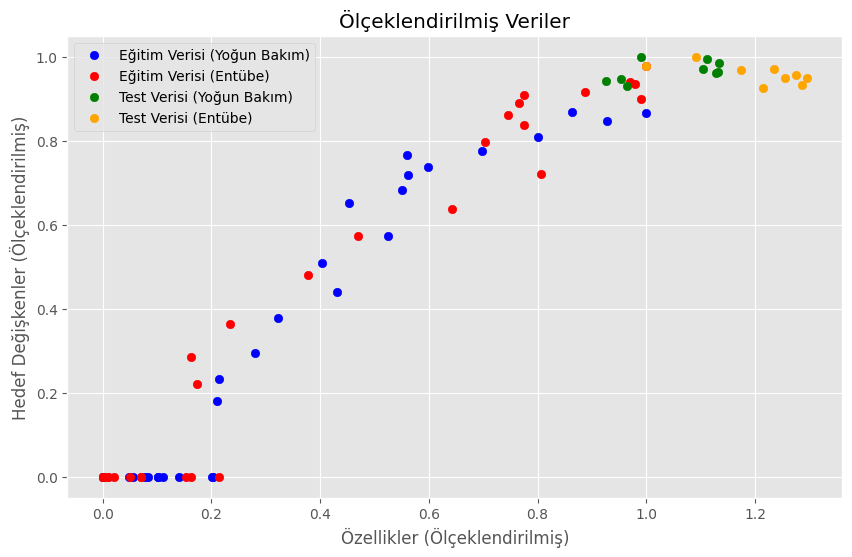

In [135]:
plt.figure(figsize=(10, 6))


# Eğitim verilerini görselleştirme
plt.scatter(X_train_scaled[:, 0], y_train_scaled[:, 0], color='blue', label='Eğitim Verisi (Yoğun Bakım)')
plt.scatter(X_train_scaled[:, 1], y_train_scaled[:, 1], color='red', label='Eğitim Verisi (Entübe)')

# Test verilerini görselleştirme
plt.scatter(X_test_scaled[:, 0], y_test_scaled[:, 0], color='green', label='Test Verisi (Yoğun Bakım)')
plt.scatter(X_test_scaled[:, 1], y_test_scaled[:, 1], color='orange', label='Test Verisi (Entübe)')

plt.title('Ölçeklendirilmiş Veriler')
plt.xlabel('Özellikler (Ölçeklendirilmiş)')
plt.ylabel('Hedef Değişkenler (Ölçeklendirilmiş)')
plt.legend()
plt.grid(True)
plt.show()



In [101]:
print(X_train_scaled.shape)
print(y_train_scaled.shape)


(33, 2)
(26, 2)
